In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score, mean_squared_error
import math

In [3]:
realreal=pd.read_csv('ข้อมูลจริงหลังจัดกลุ่ม.csv')

In [4]:
clus=pd.read_csv('clusterเเล้ว.csv')

In [79]:
group0_product = realreal.loc[realreal['cluster'] == 0, 'ผลผลิต(ตัน)'].copy()
group1_product = realreal.loc[realreal['cluster'] == 1, 'ผลผลิต(ตัน)'].copy()
group2_product = realreal.loc[realreal['cluster'] == 2, 'ผลผลิต(ตัน)'].copy()

In [80]:
realreal

,จังหวัด,สินค้าเกษตร,เนื้อที่เพาะปลูก(ไร่),เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิต(ตัน),ผลผลิตต่อเนื้อที่เพาะปลูก(กก./ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก./ไร่),ราคาสินค้าต่อหน่วย(บาท/กก),มูลค่า(ล้านบาท),latitude,longtitude,cluster
0,1,1,855,855,194,227.0,227,53.46,10.37124,8.246772,98.856646,0
1,2,1,1985,1965,118,59.0,60,53.46,6.30828,10.115470,99.068008,0
2,3,1,1286,1286,438,341.0,341,53.46,23.41548,7.807428,99.658137,2
3,4,1,12404,12104,3335,269.0,276,53.46,178.28910,8.421343,99.889529,2
4,5,1,14065,14065,1622,115.0,115,53.46,86.71212,5.948623,101.897284,1
...,...,...,...,...,...,...,...,...,...,...,...,...
116,4,10,86,86,281,3267.0,3267,43.45,12.20945,8.294287,99.856920,2
117,7,10,2,2,4,2000.0,2000,43.45,0.17380,8.735320,98.499928,0
118,8,10,3840,3169,10627,2767.0,3353,43.45,461.74315,7.802871,100.019746,2
119,11,10,223,223,907,4067.0,4067,43.45,39.40915,9.660001,98.574336,0


In [81]:
groupz_product = realreal.loc[realreal['cluster'] == 0, 'สินค้าเกษตร'].copy()
data_rub={'สินค้าเกษตร':groupz_product,'ผลผลิต(ตัน)':group0_product}
ff = pd.DataFrame(data_rub)
groupz2_product = realreal.loc[realreal['cluster'] == 1, 'สินค้าเกษตร'].copy()
data_rub2={'สินค้าเกษตร':groupz2_product,'ผลผลิต(ตัน)':group1_product}
ff2 = pd.DataFrame(data_rub2)
groupz3_product = realreal.loc[realreal['cluster'] == 2, 'สินค้าเกษตร'].copy()
data_rub3={'สินค้าเกษตร':groupz3_product,'ผลผลิต(ตัน)':group2_product}
ff3 = pd.DataFrame(data_rub3)

In [82]:
#สร้างdatasetเงาะกลุ่ม1
p1 = ff.loc[ff['สินค้าเกษตร'] == 1, 'ผลผลิต(ตัน)'].copy()
sp=sum(p1)
#สร้างdatasetเงาะกลุ่ม2
p2 = ff2.loc[ff2['สินค้าเกษตร'] == 1, 'ผลผลิต(ตัน)'].copy()
sp2=sum(p2)
#สร้างdatasetเงาะกลุ่ม3
p3 = ff3.loc[ff3['สินค้าเกษตร'] == 1, 'ผลผลิต(ตัน)'].copy()
sp3=sum(p3)

In [83]:
#สร้างdatasetกาแฟกลุ่ม1
c1 = ff.loc[ff['สินค้าเกษตร'] == 2, 'ผลผลิต(ตัน)'].copy()
cp=sum(c1)
#สร้างdatasetกาแฟกลุ่ม2
c2 = ff2.loc[ff2['สินค้าเกษตร'] == 2, 'ผลผลิต(ตัน)'].copy()
cp2=sum(c2)
#สร้างdatasetกาแฟกลุ่ม3
c3 = ff3.loc[ff3['สินค้าเกษตร'] == 2, 'ผลผลิต(ตัน)'].copy()
cp3=sum(c3)

In [84]:
#สร้างdatasetข้าวนาปรังกลุ่ม1
rp1 = ff.loc[ff['สินค้าเกษตร'] == 3, 'ผลผลิต(ตัน)'].copy()
srp=sum(rp1)
#สร้างdatasetข้าวนาปรังกลุ่ม2
rp2 = ff2.loc[ff2['สินค้าเกษตร'] == 3, 'ผลผลิต(ตัน)'].copy()
srp2=sum(rp2)
#สร้างdatasetข้าวนาปรังกลุ่ม3
rp3 = ff3.loc[ff3['สินค้าเกษตร'] == 3, 'ผลผลิต(ตัน)'].copy()
srp3=sum(rp3)

In [85]:
#สร้างdatasetข้าวนาปีกลุ่ม1
pp1 = ff.loc[ff['สินค้าเกษตร'] == 4, 'ผลผลิต(ตัน)'].copy()
spp=sum(pp1)
#สร้างdatasetข้าวนาปีกลุ่ม2
pp2 = ff2.loc[ff2['สินค้าเกษตร'] == 4, 'ผลผลิต(ตัน)'].copy()
spp2=sum(pp2)
#สร้างdatasetข้าวนาปีกลุ่ม3
pp3 = ff3.loc[ff3['สินค้าเกษตร'] == 4, 'ผลผลิต(ตัน)'].copy()
spp3=sum(pp3)

In [86]:
#สร้างdatasetทุเรียนกลุ่ม1
dp1 = ff.loc[ff['สินค้าเกษตร'] == 5, 'ผลผลิต(ตัน)'].copy()
sdp=sum(dp1)
#สร้างdatasetทุเรียนกลุ่ม2
dp2 = ff2.loc[ff2['สินค้าเกษตร'] == 5, 'ผลผลิต(ตัน)'].copy()
sdp2=sum(dp2)
#สร้างdatasetทุเรียนกลุ่ม3
dp3 = ff3.loc[ff3['สินค้าเกษตร'] == 5, 'ผลผลิต(ตัน)'].copy()
sdp3=sum(dp3)

In [87]:
#สร้างdatasetมังคุดกลุ่ม1
mp1 = ff.loc[ff['สินค้าเกษตร'] == 6, 'ผลผลิต(ตัน)'].copy()
smp=sum(mp1)
#สร้างdatasetมังคุดกลุ่ม2
mp2 = ff2.loc[ff2['สินค้าเกษตร'] == 6, 'ผลผลิต(ตัน)'].copy()
smp2=sum(mp2)
#สร้างdatasetมังคุดกลุ่ม3
mp3 = ff3.loc[ff3['สินค้าเกษตร'] == 6, 'ผลผลิต(ตัน)'].copy()
smp3=sum(mp3)

In [88]:
#สร้างdatasetยางกลุ่ม1
gg = ff.loc[ff['สินค้าเกษตร'] == 7, 'ผลผลิต(ตัน)'].copy()
sd=sum(gg)
#สร้างdatasetยางยางกลุ่ม2

gg2 = ff2.loc[ff2['สินค้าเกษตร'] == 7, 'ผลผลิต(ตัน)'].copy()
sd2=sum(gg2)
#สร้างdatasetยางยางกลุ่ม3
gg3 = ff3.loc[ff3['สินค้าเกษตร'] == 7, 'ผลผลิต(ตัน)'].copy()
sd3=sum(gg3)

In [89]:
#สร้างdatasetลองกองกลุ่ม1
lp1 = ff.loc[ff['สินค้าเกษตร'] == 8, 'ผลผลิต(ตัน)'].copy()
slp=sum(lp1)
#สร้างdatasetลองกองกลุ่ม2
lp2 = ff2.loc[ff2['สินค้าเกษตร'] == 8, 'ผลผลิต(ตัน)'].copy()
slp2=sum(lp2)
#สร้างdatasetลองกองกลุ่ม3
lp3 = ff3.loc[ff3['สินค้าเกษตร'] == 8, 'ผลผลิต(ตัน)'].copy()
slp3=sum(lp3)

In [90]:
#สร้างdatasetลำไยกลุ่ม1
tp1 = ff.loc[ff['สินค้าเกษตร'] == 9, 'ผลผลิต(ตัน)'].copy()
stp=sum(tp1)
#สร้างdatasetลำไยกลุ่ม2
tp2 = ff2.loc[ff2['สินค้าเกษตร'] == 9, 'ผลผลิต(ตัน)'].copy()
stp2=sum(tp2)
#สร้างdatasetลำไยกลุ่ม3
tp3 = ff3.loc[ff3['สินค้าเกษตร'] == 9, 'ผลผลิต(ตัน)'].copy()
stp3=sum(tp3)

In [105]:
#สร้างdatasetสับปะรดโรงงานกลุ่ม1
pa1 = ff.loc[ff['สินค้าเกษตร'] == 10, 'ผลผลิต(ตัน)'].copy()
spa=sum(pa1)
#สร้างdatasetสับปะรดโรงงานกลุ่ม2
pa2 = ff2.loc[ff2['สินค้าเกษตร'] == 10, 'ผลผลิต(ตัน)'].copy()
spa2=sum(pa2)
#สร้างdatasetสับปะรดโรงงานกลุ่ม3
pa3 = ff3.loc[ff3['สินค้าเกษตร'] == 10, 'ผลผลิต(ตัน)'].copy()
spa3=sum(pa3)

In [106]:
slp3

805

In [107]:
Cluster=['Cluster1','Cluster2','Cluster3']
C_1=[sp,cp,srp,spp,sdp,smp,sd,slp,stp,spa]
C_2=[sp2,cp2,srp2,spp2,sdp2,smp2,sd2,slp2,stp2,spa2]
C_3=[sp3,cp3,srp3,spp3,sdp3,smp3,sd3,slp3,stp3,spa3]
categories = ['1', '2', '3','4','5','6','7','8','9','10']
N = len(categories)

In [109]:
print(C_1)
print(C_2)
print(C_3)

[19440, 7711, 1114, 9095, 338440, 14623, 922678, 810, 28, 23600]
[2605, 16, 21424, 118174, 35347, 2098, 922699, 448, 118, 0]
[4997, 205, 16739, 157501, 65564, 10829, 952216, 805, 42, 10908]


In [110]:
Cluster=['Cluster1','Cluster2','Cluster3']
C_1=[stp,cp,srp,spp,slp]
C_2=[stp2,cp2,srp2,spp2,slp2]
C_3=[stp3,cp3,srp3,spp3,slp3]
categories = ['9', '2', '3','4','8']
N = len(categories)

In [111]:
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
C_1 += C_1[:1]
C_2 += C_2[:1]
C_3 += C_3[:1]

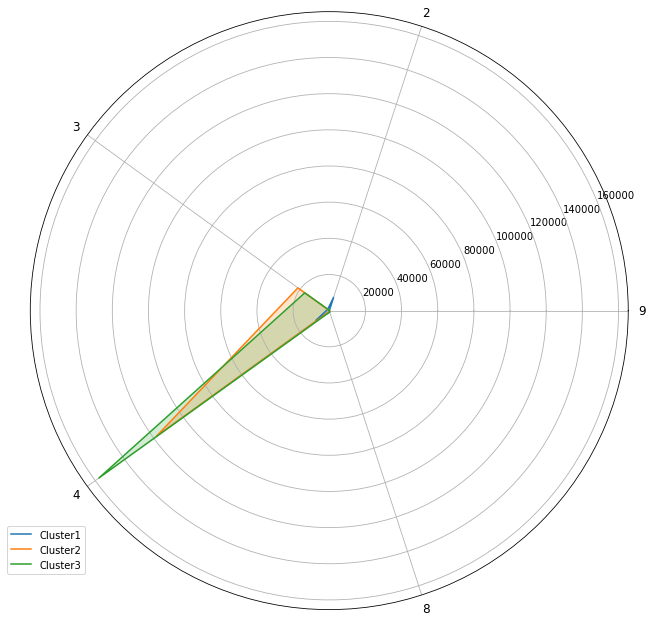

In [112]:
fig, ax = plt.subplots(figsize=(11, 11), subplot_kw=dict(polar=True))
# พล็อต radar chart สำหรับแต่ละคลาส
ax.plot(angles, C_1, label=Cluster[0])
ax.fill(angles, C_1, alpha=0.2)

ax.plot(angles, C_2, label=Cluster[1])
ax.fill(angles, C_2, alpha=0.2)

ax.plot(angles, C_3, label=Cluster[2])
ax.fill(angles, C_3, alpha=0.2)

# เพิ่มชื่อ attributes บนแกน x
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories,fontsize=12)

plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))
# แสดง radar chart
plt.show()